<h1><center>Минимизация удельных магнитных потерь стали</center></h1>
<h2><center>Обучение моделей и выявление важности признаков</center></h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 5)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/preprocessed_data.csv', index_col=False)
df.head()

,target,Длина_1,Толщина_средняя,Азот_среднее,N,ЗВО,CO_Этап2_зона1,CO_Этап2_зона2,CO_Этап2_зона4,CO2_Этап1,Калиброванное_значение_CO2_Этап2_зона4,Si,Mn,NH3_Этап3_зона3,T_Этап3_зона4,Кислород_среднее,Sn,S,Датчик_механических_свойств,Скорость_технологической_секции,H2_Этап4_зона1,H2_Этап2_зона1,H2_Этап2_зона4,H2_Этап3_зона1,H2_Этап3_зона2,NH3_Этап3_зона1,NH3_Этап3_зона2,CO_Этап2_зона5,Углерод_среднее,Т_Этап5_зона1,Т_Этап5_зона2,Т_Этап4_зона1,T_Этап1_зона1,T_Этап1_зона2,T_Этап1_зона3,T_Этап1_зона4,T_Этап1_зона5,T_Этап2_зона1,T_Этап2_зона2,T_Этап2_зона3,T_Этап2_зона4,T_Этап2_зона5,T_Этап3_зона1,T_Этап3_зона3,T_в_начале_нормализации,T_в_конце_нормализации,T_проход_1,T_проход_3,T_проход_5,T_проход_2,T_проход_4,Ti,Длина_Азотирование,Толщина_МС,Точка_росы_Этап4_зона1,Точка_росы_Этап2_зона2,T_за_средней_клетью,T_конца_проката,T_рулона,Толщина_перед_смоткой,Водород_среднее,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,CO2_Этап2_зона1,CO2_Этап2_зона3,Melubir 6736/LI
0,1.072,23.28,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,-0.02000,3.315,0.14,0.15012,309,0.08925,0.003,0.005,35.80168,68.0,51.69,69.17,53.39,36.0,18.70496,0.03,0.96,1.57069,0.0026,747.84448,745.99000,839.96000,930.18000,929.64000,909.09992,900.04120,868.47,839.90224,839.90000,840.42208,839.81000,839.19776,770.44,771.61576,1097.4032,902.1128,135.69117,181.60561,199.75004,178.91038,191.52730,0.002,3560,0.287,-19.86000,61.00448,948.368,922.78705,593.18438,2.3,1.7,1.22,69.7,63.47742,63.68000,1.58,1.6,0.1,0.06,1.0
1,1.087,25.22,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,0.82147,3.315,0.14,0.75690,25,0.08925,0.003,0.005,42.80209,68.0,51.69,69.17,53.39,36.0,14.92540,0.03,0.96,1.57050,0.0026,747.88000,745.99243,839.96243,930.17757,929.64000,909.02000,900.14577,868.47,839.92121,839.90849,840.28485,839.81000,839.18121,770.44,771.83092,1097.4368,902.2472,136.56210,183.54778,200.21433,179.18122,193.17510,0.002,3680,0.288,-19.86000,61.03515,948.232,922.81295,591.21562,2.3,1.9,1.22,70.8,63.47742,63.68000,1.58,1.6,0.1,0.06,1.0
2,1.070,27.16,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,0.88930,3.315,0.14,0.14955,290,0.08925,0.003,0.005,49.01099,68.0,51.69,69.17,53.39,36.0,9.39301,0.03,0.96,1.57033,0.0026,747.88261,746.02568,839.98000,930.14955,929.63347,909.02131,900.27045,868.47,839.93653,839.97131,840.33307,839.81000,839.19653,770.44,771.91392,1097.4704,902.3816,135.84434,183.52360,203.10431,179.27150,194.33072,0.002,4052,0.286,-19.86000,60.99739,948.096,922.83886,589.24686,2.3,2.2,1.25,69.9,63.47742,63.67869,1.58,1.6,0.1,0.06,1.0
3,1.075,29.10,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,0.12112,3.315,0.14,0.99482,231,0.08925,0.003,0.005,47.76400,68.0,51.69,69.17,53.39,36.0,19.39390,0.03,0.96,1.57071,0.0026,747.91260,746.14680,839.97720,930.05480,929.58860,909.02300,900.34140,868.47,839.97300,839.99960,840.41020,839.79180,839.24000,770.44,771.96100,1097.5040,902.5160,135.12658,183.78471,205.98112,179.27150,196.10320,0.002,4576,0.286,-19.83760,60.98140,948.000,922.77619,587.41619,2.3,1.5,2.81,69.1,63.47742,63.66860,1.58,1.6,0.1,0.06,1.0
4,1.064,31.04,25,0.0225,0.0083,3.5,1.73,1.15,0.21,0.11,-0.77680,3.315,0.14,-0.97655,235,0.08925,0.003,0.005,47.89488,68.0,51.69,69.17,53.39,36.0,21.80116,0.03,0.96,1.57064,0.0026,747.99597,746.25896,839.96896,929.89403,929.58597,908.98000,900.35000,868.47,839.95688,840.13493,840.33805,839.69344,839.23851,770.44,772.08104,1097.5376,902.6504,135.65801,185.73150,208.78339,179.78672,198.51690,0.002,2090,0.285,-19.68059,60.98701,948.000,922.50095,585.91695,2.3,1.2,1.49,71.9,63.47742,63.65851,1.58,1.6,0.1,0.06,1.0


<br><br>

## 1. Обучение моделей

In [3]:
X = df.drop('target', axis=1)
y = df['target'].copy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Гиперпараметры моделей будем подбирать с помощью <b>GridSearchCV</b>. Метрику качества я выбрал <b>MAE</b> для лучшей интерпретируемости.

### 1.1 Random Forest Regressor

In [4]:
# model=RandomForestRegressor(random_state=1)
# param_grid = { 
#      'n_estimators': [500, 600, 700],
#      'max_features': ['auto'],
#      'max_depth' : [24, 32]
#  }

# CV_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='neg_mean_absolute_error', cv=5, verbose=1)
# CV_model.fit(x_train, y_train)

# CV_model.best_params_

In [5]:
rfr = RandomForestRegressor(max_features='auto', n_estimators=700, max_depth=32, random_state=1)
rfr.fit(x_train, y_train)

pred = rfr.predict(x_test)
print("MAE для RandomForestRegressor: {:.3f}".format(mean_absolute_error(y_test, pred)))

MAE для RandomForestRegressor: 0.014


<AxesSubplot:>

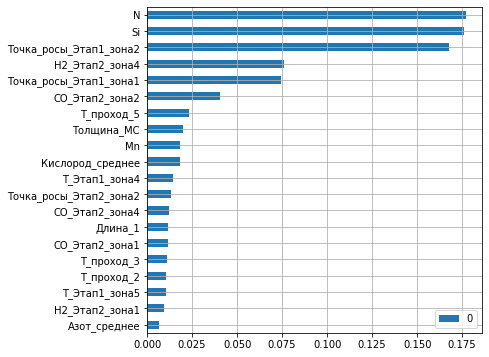

In [6]:
pd.DataFrame(rfr.feature_importances_, index=X.columns).sort_values(by=0).tail(20).plot(kind='barh', grid=True, figsize=(6,6))

### 1.2 ElasticNet

In [7]:
# model = ElasticNet(normalize=True)
# param_grid = {
#     "max_iter": [1, 5, 10],
#     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#     "l1_ratio": np.arange(0.0, 1.0, 0.1)
# }

# CV_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring="neg_mean_absolute_error", cv=5)
# CV_model.fit(x_train, y_train)

# CV_model.best_params_

In [8]:
lr_EN = ElasticNet(normalize=True, alpha=0.0001, l1_ratio=0.9, max_iter=10, random_state=1)
lr_EN.fit(x_train, y_train)

pred = lr_EN.predict(x_test)
print("MAE для ElasticNet: {:.3f}".format(mean_absolute_error(y_test, pred)))

MAE для ElasticNet: 0.111


<AxesSubplot:>

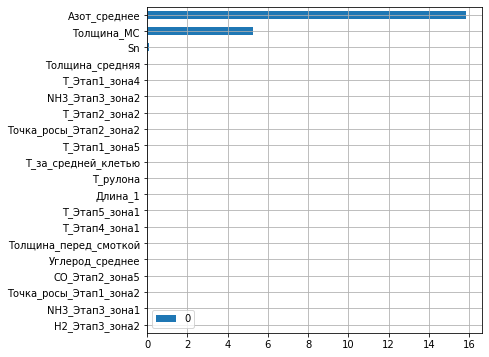

In [9]:
pd.DataFrame(lr_EN.coef_, index=X.columns).sort_values(by=0).tail(20).plot(kind='barh', grid=True, figsize=(6,6))

### 1.3 XGBRegressor

In [10]:
# model = XGBRegressor(objective='reg:squarederror', nthread=4, seed=1)

# param_grid = {
#     'learning_rate': [0.03, 0.05, 0.07],
#     'max_depth': [5, 6, 7],
#     'min_child_weight': [3, 10],
#     'subsample': [0.5, 0.8],
#     'n_estimators': [100, 500]
# }

# CV_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring="neg_mean_absolute_error", cv=5, verbose=2)
# CV_model.fit(x_train, y_train)

# CV_model.best_params_

In [11]:
xgbr = XGBRegressor(
    objective='reg:squarederror', 
    nthread=4, 
    learning_rate=0.07, 
    max_depth=7, 
    min_child_weight=3, 
    n_estimators=500,
    subsample=0.8,
    seed=1
)

xgbr.fit(x_train, y_train)
pred = xgbr.predict(x_test)
print("MAE для XGBRegressor: {:.3f}".format(mean_absolute_error(y_test, pred)))

MAE для XGBRegressor: 0.015


<AxesSubplot:>

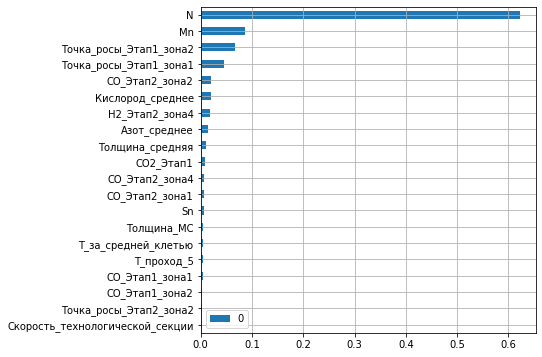

In [12]:
pd.DataFrame(xgbr.feature_importances_, index=X.columns).sort_values(by=0).tail(20).plot(kind='barh', grid=True, figsize=(6,6))

<br><br>

## Важность признаков

Итак, лучшую точность показал <b>RandomForestRegressor</b>. На эту модель и будем ориентироваться.<br>
Найдем <b>20</b> самых важных признаков.

<AxesSubplot:>

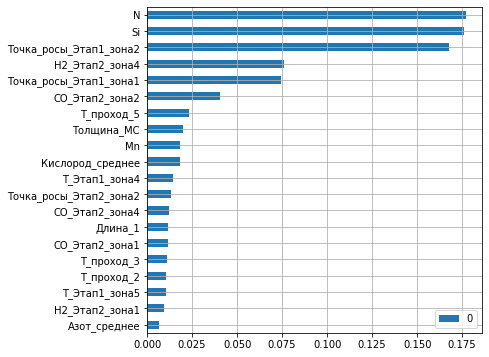

In [13]:
NF = 20
pd.DataFrame(rfr.feature_importances_, index=X.columns).sort_values(by=0).tail(NF).plot(kind='barh', grid=True, figsize=(6,6))

In [14]:
features = pd.DataFrame(rfr.feature_importances_, index=X.columns).sort_values(by=0).tail(NF).sort_values(by=0, ascending=False)
features.rename(columns={0: "importance"}, inplace=True)
features

,importance
N,0.17710
Si,0.17580
Точка_росы_Этап1_зона2,0.16771
H2_Этап2_зона4,0.07593
Точка_росы_Этап1_зона1,0.07460
CO_Этап2_зона2,0.04051
T_проход_5,0.02314
Толщина_МС,0.02012
Mn,0.01844
Кислород_среднее,0.01827


In [15]:
features_description = pd.read_csv('./data/parameters_description.csv')
features_description.head(5)

,Название параметра,Этап обработки,Описание
0,Длина_ГП,Горячий прокат,Фактическая длина на этапе горячей прокатки
1,T_за_средней_клетью,Горячий прокат,Замеры температур
2,T_конца_проката,Горячий прокат,Замеры температур
3,T_рулона,Горячий прокат,Замеры температур
4,Толщина_перед_смоткой,Горячий прокат,Замер толщины


<br><br>

### ИТОГОВАЯ ТАБЛИЦА ВАЖНОСТИ ПРИЗНАКОВ

In [16]:
features_importance_df = pd.DataFrame(columns=['Название параметра', 'Этап обработки', 'Важность %', 'Корреляция с целевым признаком'])
features_importance_df['Название параметра'] = features.index
features_importance_df['Важность %'] = np.around(features['importance'].values*100, 2)
features_importance_df.sort_values(by='Название параметра', inplace=True)
features_importance_df['Этап обработки'] = features_description[
    features_description[
        'Название параметра'
    ].isin(features.index)
].sort_values(by='Название параметра')['Этап обработки'].values


corrFeatures = features.index.values.tolist()
corrFeatures.append('target')
corrMatrix = df[corrFeatures].corr()
features_importance_df['Корреляция с целевым признаком'] = corrMatrix.sort_index()[['target']].drop(['target'], axis=0)['target'].values
features_importance_df.sort_values(by='Важность %', ascending=False, inplace=True)
features_importance_df

,Название параметра,Этап обработки,Важность %,Корреляция с целевым признаком
0,N,Химия плавки,17.71,-0.50757
1,Si,Химия плавки,17.58,0.22158
2,Точка_росы_Этап1_зона2,Обезуглероживание,16.77,0.01884
3,H2_Этап2_зона4,Обезуглероживание,7.59,-0.08162
4,Точка_росы_Этап1_зона1,Обезуглероживание,7.46,-0.60268
5,CO_Этап2_зона2,Обезуглероживание,4.05,-0.07074
6,T_проход_5,Холодный прокат,2.31,-0.17815
7,Толщина_МС,Магнитные свойства,2.01,0.26061
8,Mn,Химия плавки,1.84,-0.07831
9,Кислород_среднее,Химия итог,1.83,0.07427


### Обучим несколько моделей на выбранных признаках.

In [17]:
X = df[features.index]
y = df['target'].copy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
rfr = RandomForestRegressor(max_features='auto', n_estimators=800, max_depth=50, random_state=1)
rfr.fit(x_train, y_train)

pred = rfr.predict(x_test)
print("MAE для RandomForestRegressor: {:.3f}".format(mean_absolute_error(y_test, pred)))

MAE для RandomForestRegressor: 0.014


In [19]:
xgbr = XGBRegressor(
    objective='reg:squarederror', 
    nthread=4, 
    learning_rate=0.07, 
    max_depth=7, 
    min_child_weight=3, 
    n_estimators=500,
    subsample=0.8,
    seed=1
)

xgbr.fit(x_train, y_train)
pred = xgbr.predict(x_test)
print("MAE для XGBRegressor: {:.3f}".format(mean_absolute_error(y_test, pred)))

MAE для XGBRegressor: 0.015


In [20]:
lr_EN = ElasticNet(normalize=True, alpha=0.0001, l1_ratio=0.9, max_iter=10, random_state=1)
lr_EN.fit(x_train, y_train)

pred = lr_EN.predict(x_test)
print("MAE для ElasticNet: {:.3f}".format(mean_absolute_error(y_test, pred)))

MAE для ElasticNet: 0.136


<br><br>

## Вывод

Лучшее качество показывает RandomForest на 20 признаках. Градиентный бустинг также показал неплохое качество. Линейная модель от них сильно отстала.

По таблице важности признаков необходима консультация человека из предметной области для "валидации" наших результатов.